In [1]:
import os
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn import metrics, svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

import cv2
from PIL import Image
from skimage import color

Using TensorFlow backend.


In [0]:
import pickle

In [0]:
blnLoaData =  True
blnBuildModel = False

Load Data


In [3]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
binary_flder = '/content/drive/Shared drives/DS8013/Data/Binary/'


In [0]:
X = np.load(binary_flder + 'X.npy')
y = np.load(binary_flder + 'y.npy')
#y_onehot = np.load(binary_flder + 'y_onehot.npy')

In [0]:
X = X / 255 #mormalize

In [0]:
unique_elements, counts_elements = np.unique(y, return_counts=True)

In [0]:
(list(zip(unique_elements, counts_elements)))

[('AnnualCrop', 3000),
 ('Forest', 3000),
 ('HerbaceousVegetation', 3000),
 ('Highway', 2500),
 ('Industrial', 2500),
 ('Pasture', 2000),
 ('PermanentCrop', 2500),
 ('Residential', 3000),
 ('River', 2500),
 ('SeaLake', 3000)]

Flatten Data

In [0]:
X_flatten = X.flatten().reshape(len(X), 64*64*3) # flatten 64*64*3 = 12288

X_flatten.shape

(27000, 12288)

Label Encoder for y




In [0]:
#label encoding to integer
le = preprocessing.LabelEncoder()
le.fit(y)

#after encoding
y_le = le.transform(y)

y_le


array([3, 3, 3, ..., 6, 6, 6])

One-encoder for Y

In [0]:
# one hot encode

#label encoding to integer
le = preprocessing.LabelEncoder()
le.fit(y)

#after encoding
label_encoded = le.transform(y)

# one hot encode
y_onehot = to_categorical(label_encoded)

In [0]:
y_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Split data



In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_flatten, y_le, test_size=0.20, random_state=42, shuffle=True)

In [0]:
le.inverse_transform([np.argmax(y_train[101])])

array(['AnnualCrop'], dtype='<U20')

In [0]:
X_train.shape

(21600, 12288)

In [0]:
X_test.shape

(5400, 12288)

In [0]:
y_train[0:10]

array([0, 4, 3, 9, 2, 1, 0, 8, 7, 3])

## XBG

In [0]:

from xgboost import XGBClassifier



In [0]:
model_flder = '/content/drive/Shared drives/DS8013/Model/'


if blnBuildModel :

  #models = []
  for pair in [(100, 0.1), (100, 0.01)]:
      nestimator = pair[0]
      lr = pair[1]
      print('n_estimator:{0}, lr:{1}'.format(nestimator, lr))
      model = XGBClassifier(n_estimators=nestimator, learning_rate=lr) 
      model.fit(X_train, y_train) # train the classifier
      
      models.append({'model':model, 'n_estimators':nestimator, 'learning_rate':lr})
      pickle.dump(models, open(model_flder + 'Normal_XGB_Models.p' , "wb" ) )
  
else:

  models = pickle.load(open(model_flder + 'Normal_XGB_Models.p', 'rb'))


n_estimator:100, lr:0.1
n_estimator:100, lr:0.01


In [0]:
models

[{'learning_rate': 0.01,
  'model': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0,
                learning_rate=0.01, max_delta_step=0, max_depth=3,
                min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
                nthread=None, objective='multi:softprob', random_state=0,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                silent=None, subsample=1, verbosity=1),
  'n_estimators': 50},
 {'learning_rate': 0.1,
  'model': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0,
                learning_rate=0.1, max_delta_step=0, max_depth=3,
                min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
                nthread=None, objective='multi:softprob', random_state=0,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None

In [0]:
accuracy = []
for m in models:
  predicted = m['model'].predict(X_test)
  images_and_predictions = list(zip(X_test, le.inverse_transform(predicted), le.inverse_transform(y_test)))

  numCorrect = len([p for (p,a) in list(zip(predicted, y_test)) if p==a])
  accuracy.append( numCorrect / len(predicted))



In [0]:
accuracy


[0.5085185185185185, 0.645, 0.5474074074074075]

In [0]:
models

[{'learning_rate': 0.01,
  'model': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0,
                learning_rate=0.01, max_delta_step=0, max_depth=3,
                min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
                nthread=None, objective='multi:softprob', random_state=0,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                silent=None, subsample=1, verbosity=1),
  'n_estimators': 50},
 {'learning_rate': 0.1,
  'model': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0,
                learning_rate=0.1, max_delta_step=0, max_depth=3,
                min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
                nthread=None, objective='multi:softprob', random_state=0,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None

In [0]:
predicted = models[0]['model'].predict(X_test)

In [0]:
images_and_predictions = list(zip(X_test, le.inverse_transform(predicted), le.inverse_transform(y_test)))


In [0]:
print(len(predicted))
len([p for (p,a) in list(zip(predicted, y_test)) if p==a])

5400


2746

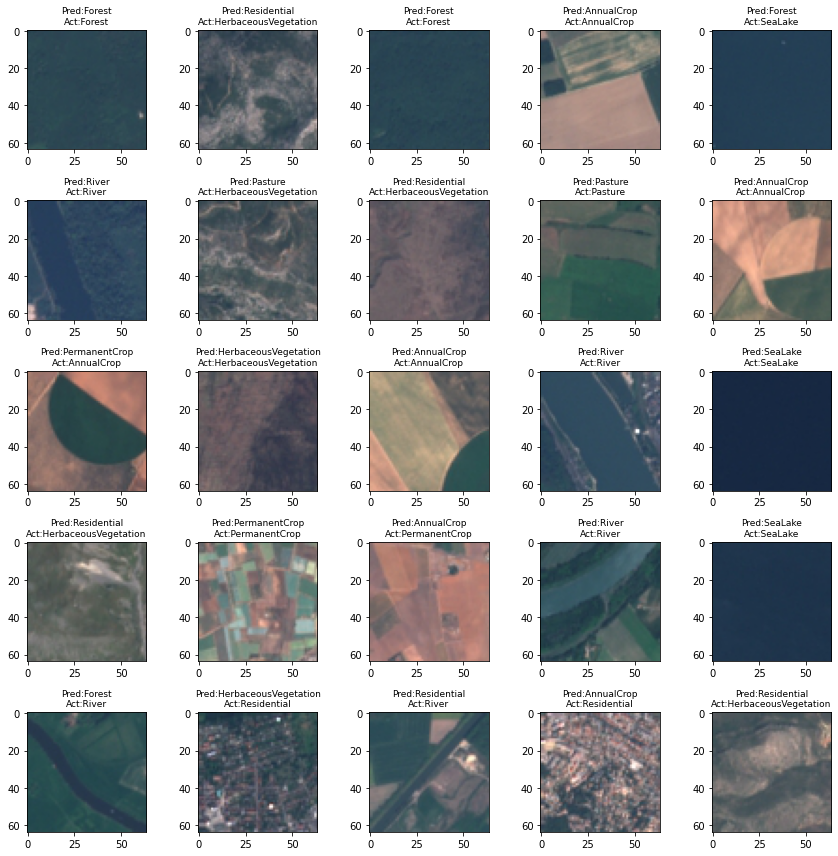

In [0]:
rdm_size = 25
num_fig = 5
#view random images
np.random.seed(100)
rdm_idx_list =  np.random.choice(range(len(images_and_predictions)), rdm_size, replace=False)

fig, axes = plt.subplots(num_fig, num_fig, figsize=(12,12))

for i in range(len(rdm_idx_list)):

  col = i % num_fig
  row = int(i / num_fig) 

  idx = rdm_idx_list[i]
  axes[row][col].set_title('Pred:{0}\nAct:{1}'.format(images_and_predictions[i][1],images_and_predictions[i][2]), fontsize=9 )
  axes[row][col].imshow(images_and_predictions[i][0].reshape((64,64, 3)))

plt.tight_layout()

In [0]:
print('a')

In [0]:
print('b')